In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from dataloader import load_data, visualize_images

# Load data and get train_dir
train_generator, test_generator = load_data()

# Obtain train_dir from train_generator
train_dir = train_generator.directory
test_dir = test_generator.directory

Found 202 images belonging to 2 classes.
Found 189 images belonging to 2 classes.


In [4]:
# Load MobileNet Model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

/tmp/ipykernel_16978/4086018123.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# Build Transfer Learning Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [7]:
# Compile the Model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# Prepare Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 202 images belonging to 2 classes.
Found 189 images belonging to 2 classes.


In [9]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10


/home/sarahesayas/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5915 - loss: 0.8174 - val_accuracy: 0.5450 - val_loss: 2.6416
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 835ms/step - accuracy: 0.9209 - loss: 0.2245 - val_accuracy: 0.8360 - val_loss: 0.4842
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 832ms/step - accuracy: 0.9825 - loss: 0.0617 - val_accuracy: 0.9101 - val_loss: 0.2589
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 836ms/step - accuracy: 0.9973 - loss: 0.0312 - val_accuracy: 0.9259 - val_loss: 0.2129
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 834ms/step - accuracy: 0.9962 - loss: 0.0333 - val_accuracy: 0.8466 - val_loss: 0.3893
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 876ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.9471 - val_loss: 0.1647
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 894ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.9841 - val_loss: 0.0405
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 872ms/step - accuracy: 0.9971 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch

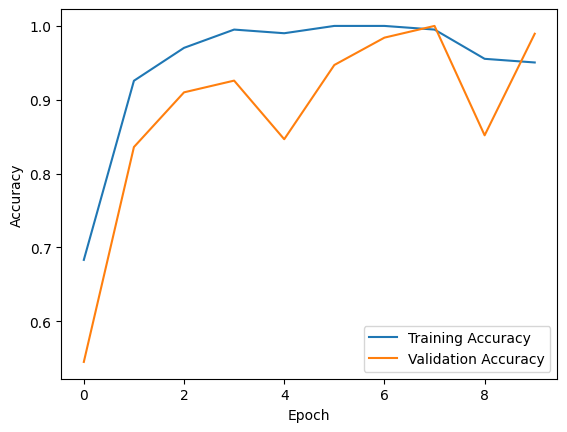

In [10]:
# Learning Curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
model.save("mobilenet_model.h5")